# Projeto Sinais e Sistemas Dinâmicos 2019.1

**Professor:** Derzu Omaia

**Grupo:**
- Aléxandros Augustus
- Ana Maria da Silva
- Gabriel Formiga
- Johan Kevin de Freitas

In [1]:
#importando ferramentas
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn import neighbors
from sklearn.metrics import accuracy_score

## 1 Aplicação da Transformada de Fourier Bidimensional
O primeiro passo é extrair as imagens dos arquivos como matrizes numéricas para que possamos aplicar a transformada de Fourier bidimensional e então faremos um shift para concentrar o resultado da transformada no centro da imagem para que seja mais fácil utilizá-lo. Ao extrair estamos logo separando os futuros conjuntos de treinamento e teste onde será utilizado KNN. As imagens selecionadas para teste são uma imagem aleatória de cada pessoa.

In [2]:
faces_test = []
faces_train = []

#extraindo fotos como matrizes numéricas
n = random.randint(0,9)
for i in range(40):
    for j in range(10):
        if j == n:
            faces_test.append(np.array(cv2.imread(f'orl_faces/s{i+1}/{j+1}.pgm',0)))
        else:
            faces_train.append(np.array(cv2.imread(f'orl_faces/s{i+1}/{j+1}.pgm',0)))
print(n)
print(len(faces_train))
print(len(faces_test))

9
360
40


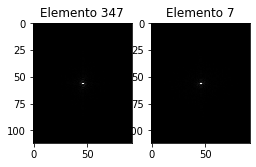

In [3]:
#aplicando transformada de Fourier bidimensional e o shift
faces_trainfft = [np.fft.fft2(n) for n in faces_train]
faces_testfft = [np.fft.fft2(n) for n in faces_test]
faces_trainshift = [np.fft.fftshift(n) for n in faces_trainfft]
faces_testshift = [np.fft.fftshift(n) for n in faces_testfft]
    
x = random.randint(0,len(faces_trainshift)-1)
y = random.randint(0,len(faces_testshift)-1)

#exibindo elemento qualquer das imagens extraídas e transformadas
plt.subplot(131)
plt.imshow(np.abs(faces_trainshift[x]),cmap='gray')
plt.title(f'Elemento {x+1}')

plt.subplot(132)
plt.imshow(np.abs(faces_testshift[y]),cmap='gray')
plt.title(f'Elemento {y+1}')

plt.show()

Agora queremos diminuir o tamanho da imagem para os tamanhos 2x2 pixels e 50x50 pixels, para isso fazemos uma função que
encontra o pixel central e a partir desse pixel retorna apenas a região da imagem com o tamanho a que desejamos reduzir.

In [4]:
#função que reduz a imagem para o tamanho dxd
def crop(d,img):
    x = 92//2
    y = 112//2
    r = d//2
    
    return img[x-r:x+r,y-r:y+r]

In [5]:
#aplicando redução em todas as imagens da transformada de fourier bidimensional com shift
faces2_train = [np.array(crop(2,img)).flatten() for img in faces_trainshift]
faces2_test = [np.array(crop(2,img)).flatten() for img in faces_testshift]
faces50_train = [np.array(crop(50,img)).flatten() for img in faces_trainshift]
faces50_test = [np.array(crop(50,img)).flatten() for img in faces_testshift]

print(np.array(faces2_train).shape)
print(np.array(faces2_test).shape)
print(np.array(faces50_train).shape)
print(np.array(faces50_test).shape)

(360, 4)
(40, 4)
(360, 2500)
(40, 2500)


In [6]:
#aplicando redução em todas as imagens da transformada de fourier bidimensional com shift
faces20_train = [np.array(crop(20,img)).flatten() for img in faces_trainshift]
faces20_test = [np.array(crop(20,img)).flatten() for img in faces_testshift]
faces30_train = [np.array(crop(30,img)).flatten() for img in faces_trainshift]
faces30_test = [np.array(crop(30,img)).flatten() for img in faces_testshift]

print(np.array(faces20_train).shape)
print(np.array(faces20_test).shape)
print(np.array(faces30_train).shape)
print(np.array(faces30_test).shape)

(360, 400)
(40, 400)
(360, 900)
(40, 900)


Após gerarmos as imagens reduzidas podemos finalmente guardar esses resultados nas bases de dados que desejamos utilizar
para aplicar o KNN.

In [7]:
#2x2 real e imaginário
f2r_train = []
f2r_test = []
f2i_train = []
f2i_test = []

for n in range(360):
    f2r_train.append(np.array(faces2_train[n]).real)
    f2i_train.append(np.array(faces2_train[n]).imag)

for n in range(40):
    f2r_test.append(np.array(faces2_test[n]).real)
    f2i_test.append(np.array(faces2_test[n]).imag)
    
#50x50 real e imaginário
f50r_train = []
f50r_test = []
f50i_train = []
f50i_test = []

for n in range(360):
    f50r_train.append(np.array(faces50_train[n]).real)
    f50i_train.append(np.array(faces50_train[n]).imag)
    
for n in range(40):
    f50r_test.append(np.array(faces50_test[n]).real)
    f50i_test.append(np.array(faces50_test[n]).imag)

In [8]:
#20x20 real e imaginário
f20r_train = []
f20r_test = []
f20i_train = []
f20i_test = []

for n in range(360):
    f20r_train.append(np.array(faces20_train[n]).real)
    f20i_train.append(np.array(faces20_train[n]).imag)

for n in range(40):
    f20r_test.append(np.array(faces20_test[n]).real)
    f20i_test.append(np.array(faces20_test[n]).imag)
    
#30x30 real e imaginário
f30r_train = []
f30r_test = []
f30i_train = []
f30i_test = []

for n in range(360):
    f30r_train.append(np.array(faces30_train[n]).real)
    f30i_train.append(np.array(faces30_train[n]).imag)
    
for n in range(40):
    f30r_test.append(np.array(faces30_test[n]).real)
    f30i_test.append(np.array(faces30_test[n]).imag)

In [9]:
#combinando módulos real e imaginário em uma base única
f2ri_train = []
f2ri_test = []
f50ri_train = []
f50ri_test = []

for x in range(360):
    f2ri_train.append([])
    f50ri_train.append([])
    for y1 in range(4):
        f2ri_train[x].append(f2r_train[x][y1]+f2i_train[x][y1])
    for y2 in range(2500):
        f50ri_train[x].append(f50r_train[x][y2]+f50i_train[x][y2])
        
for x in range(40):
    f2ri_test.append([])
    f50ri_test.append([])
    for y1 in range(4):
        f2ri_test[x].append(f2r_test[x][y1]+f2i_test[x][y1])
    for y2 in range(2500):
        f50ri_test[x].append(f50r_test[x][y2]+f50i_test[x][y2])

In [10]:
#combinando módulos real e imaginário em uma base única
f20ri_train = []
f20ri_test = []
f30ri_train = []
f30ri_test = []

for x in range(360):
    f20ri_train.append([])
    f30ri_train.append([])
    for y1 in range(400):
        f20ri_train[x].append(f20r_train[x][y1]+f20i_train[x][y1])
    for y2 in range(900):
        f30ri_train[x].append(f30r_train[x][y2]+f30i_train[x][y2])
        
for x in range(40):
    f20ri_test.append([])
    f30ri_test.append([])
    for y1 in range(400):
        f20ri_test[x].append(f20r_test[x][y1]+f20i_test[x][y1])
    for y2 in range(900):
        f30ri_test[x].append(f30r_test[x][y2]+f30i_test[x][y2])

## 2  Utilização de KNN
### 2.1 Preparação das bases
Agora que temos os dados necessários precisamos organizá-los em um conjunto com os *labels* de cada imagem para que a função de KNN seja capaz de classificá-las, para isso vamos transformar cada pixel das imagens como uma coluna e adicionamos esses dados a um *data frame* do pandas as matrizes com os respectivos *labels*.

In [11]:
#gerando array de labels
labels_train = [(x+1) for x in range(40) for y in range(9)]
labels_test = [(x+1) for x in range(40)]

#adicionando os dados com labels aos respectivos data frames
datareal2_train = {'Pessoa':labels_train,'Imagem':f2r_train}
real2_train = pd.DataFrame(data=datareal2_train)
datareal2_test = {'Pessoa':labels_test,'Imagem':f2r_test}
real2_test = pd.DataFrame(data=datareal2_test)

dataimag2_train = {'Pessoa':labels_train,'Imagem':f2i_train}
imag2_train = pd.DataFrame(data=dataimag2_train)
dataimag2_test = {'Pessoa':labels_test,'Imagem':f2i_test}
imag2_test = pd.DataFrame(data=dataimag2_test)

datari2_train = {'Pessoa':labels_train,'Imagem':f2ri_train}
ri2_train = pd.DataFrame(data=datari2_train)
datari2_test = {'Pessoa':labels_test,'Imagem':f2ri_test}
ri2_test = pd.DataFrame(data=datari2_test)

aux2_train = [np.concatenate((real2_train['Imagem'][n],imag2_train['Imagem'][n])) for n in range(360)]
datafull2_train = {'Pessoa':labels_train,'Imagem':aux2_train}
full2_train = pd.DataFrame(data=datafull2_train)
aux2_test = [np.concatenate((real2_test['Imagem'][n],imag2_test['Imagem'][n])) for n in range(40)]
datafull2_test = {'Pessoa':labels_test,'Imagem':aux2_test}
full2_test = pd.DataFrame(data=datafull2_test)

conc2_train = pd.concat([real2_train,imag2_train],ignore_index=True)
conc2_test = pd.concat([real2_test, imag2_test],ignore_index=True)

datareal50_train = {'Pessoa':labels_train,'Imagem':f50r_train}
real50_train = pd.DataFrame(data=datareal50_train)
datareal50_test = {'Pessoa':labels_test,'Imagem':f50r_test}
real50_test = pd.DataFrame(data=datareal50_test)
                  
dataimag50_train = {'Pessoa':labels_train,'Imagem':f50i_train}
imag50_train = pd.DataFrame(data=dataimag50_train)
dataimag50_test = {'Pessoa':labels_test,'Imagem':f50i_test}
imag50_test = pd.DataFrame(data=dataimag50_test)
                  
datari50_train = {'Pessoa':labels_train,'Imagem':f50ri_train}
ri50_train = pd.DataFrame(data=datari50_train)
datari50_test = {'Pessoa':labels_test,'Imagem':f50ri_test}
ri50_test = pd.DataFrame(data=datari50_test)

aux50_train = [np.concatenate((real50_train['Imagem'][n],imag50_train['Imagem'][n])) for n in range(360)]
datafull50_train = {'Pessoa':labels_train,'Imagem':aux50_train}
full50_train = pd.DataFrame(data=datafull50_train)
aux50_test = [np.concatenate((real50_test['Imagem'][n],imag50_test['Imagem'][n])) for n in range(40)]
datafull50_test = {'Pessoa':labels_test,'Imagem':aux50_test}
full50_test = pd.DataFrame(data=datafull50_test)

conc50_train = pd.concat([real50_train,imag50_train],ignore_index=True)
conc50_test = pd.concat([real50_test, imag50_test],ignore_index=True)

In [12]:
#gerando array de labels
labels_train = [(x+1) for x in range(40) for y in range(9)]
labels_test = [(x+1) for x in range(40)]

#adicionando os dados com labels aos respectivos data frames
datareal20_train = {'Pessoa':labels_train,'Imagem':f20r_train}
real20_train = pd.DataFrame(data=datareal20_train)
datareal20_test = {'Pessoa':labels_test,'Imagem':f20r_test}
real20_test = pd.DataFrame(data=datareal20_test)

dataimag20_train = {'Pessoa':labels_train,'Imagem':f20i_train}
imag20_train = pd.DataFrame(data=dataimag20_train)
dataimag20_test = {'Pessoa':labels_test,'Imagem':f20i_test}
imag20_test = pd.DataFrame(data=dataimag20_test)

datari20_train = {'Pessoa':labels_train,'Imagem':f20ri_train}
ri20_train = pd.DataFrame(data=datari20_train)
datari20_test = {'Pessoa':labels_test,'Imagem':f20ri_test}
ri20_test = pd.DataFrame(data=datari20_test)

aux20_train = [np.concatenate((real20_train['Imagem'][n],imag20_train['Imagem'][n])) for n in range(360)]
datafull20_train = {'Pessoa':labels_train,'Imagem':aux20_train}
full20_train = pd.DataFrame(data=datafull20_train)
aux20_test = [np.concatenate((real20_test['Imagem'][n],imag20_test['Imagem'][n])) for n in range(40)]
datafull20_test = {'Pessoa':labels_test,'Imagem':aux20_test}
full20_test = pd.DataFrame(data=datafull20_test)

conc20_train = pd.concat([real20_train,imag20_train],ignore_index=True)
conc20_test = pd.concat([real20_test, imag20_test],ignore_index=True)

datareal30_train = {'Pessoa':labels_train,'Imagem':f30r_train}
real30_train = pd.DataFrame(data=datareal30_train)
datareal30_test = {'Pessoa':labels_test,'Imagem':f30r_test}
real30_test = pd.DataFrame(data=datareal30_test)
                  
dataimag30_train = {'Pessoa':labels_train,'Imagem':f30i_train}
imag30_train = pd.DataFrame(data=dataimag30_train)
dataimag30_test = {'Pessoa':labels_test,'Imagem':f30i_test}
imag30_test = pd.DataFrame(data=dataimag30_test)
                  
datari30_train = {'Pessoa':labels_train,'Imagem':f30ri_train}
ri30_train = pd.DataFrame(data=datari30_train)
datari30_test = {'Pessoa':labels_test,'Imagem':f30ri_test}
ri30_test = pd.DataFrame(data=datari30_test)

aux30_train = [np.concatenate((real30_train['Imagem'][n],imag30_train['Imagem'][n])) for n in range(360)]
datafull30_train = {'Pessoa':labels_train,'Imagem':aux30_train}
full30_train = pd.DataFrame(data=datafull30_train)
aux30_test = [np.concatenate((real30_test['Imagem'][n],imag30_test['Imagem'][n])) for n in range(40)]
datafull30_test = {'Pessoa':labels_test,'Imagem':aux30_test}
full30_test = pd.DataFrame(data=datafull30_test)

conc30_train = pd.concat([real30_train,imag30_train],ignore_index=True)
conc30_test = pd.concat([real30_test, imag30_test],ignore_index=True)

### 2.2 Configuração e uso do KNN
Estamos utilizando a ferramenta *scikit-learn* para executar o KNN, a métrica de distância utilizada é a distância euclidiana que é calculada pela própria função do *scikit-learn*.

In [13]:
#definindo classificador
knn = neighbors.KNeighborsClassifier(n_neighbors=1,metric='euclidean')

#treinando o classficador e gerando resultados
knn.fit(list(real2_train['Imagem']),real2_train['Pessoa'])
resultr2 = knn.predict(list(real2_test['Imagem']))

knn.fit(list(imag2_train['Imagem']),imag2_train['Pessoa'])
resulti2 = knn.predict(list(imag2_test['Imagem']))

knn.fit(list(ri2_train['Imagem']),ri2_train['Pessoa'])
resultri2 = knn.predict(list(ri2_test['Imagem']))

knn.fit(list(full2_train['Imagem']),full2_train['Pessoa'])
resultfull2 = knn.predict(list(full2_test['Imagem']))

knn.fit(list(conc2_train['Imagem']),conc2_train['Pessoa'])
resultconc2 = knn.predict(list(conc2_test['Imagem']))

knn.fit(list(real50_train['Imagem']),real50_train['Pessoa'])
resultr50 = knn.predict(list(real50_test['Imagem']))

knn.fit(list(imag50_train['Imagem']),imag50_train['Pessoa'])
resulti50 = knn.predict(list(imag50_test['Imagem']))

knn.fit(list(ri50_train['Imagem']),ri50_train['Pessoa'])
resultri50 = knn.predict(list(ri50_test['Imagem']))

knn.fit(list(full50_train['Imagem']),full50_train['Pessoa'])
resultfull50 = knn.predict(list(full50_test['Imagem']))

knn.fit(list(conc50_train['Imagem']),conc50_train['Pessoa'])
resultconc50 = knn.predict(list(conc50_test['Imagem']))

In [14]:
#definindo classificador
knn = neighbors.KNeighborsClassifier(n_neighbors=1,metric='euclidean')

#treinando o classficador e gerando resultados
knn.fit(list(real20_train['Imagem']),real20_train['Pessoa'])
resultr20 = knn.predict(list(real20_test['Imagem']))

knn.fit(list(imag20_train['Imagem']),imag20_train['Pessoa'])
resulti20 = knn.predict(list(imag20_test['Imagem']))

knn.fit(list(ri20_train['Imagem']),ri20_train['Pessoa'])
resultri20 = knn.predict(list(ri20_test['Imagem']))

knn.fit(list(full20_train['Imagem']),full20_train['Pessoa'])
resultfull20 = knn.predict(list(full20_test['Imagem']))

knn.fit(list(conc20_train['Imagem']),conc20_train['Pessoa'])
resultconc20 = knn.predict(list(conc20_test['Imagem']))

knn.fit(list(real30_train['Imagem']),real30_train['Pessoa'])
resultr30 = knn.predict(list(real30_test['Imagem']))

knn.fit(list(imag30_train['Imagem']),imag30_train['Pessoa'])
resulti30 = knn.predict(list(imag30_test['Imagem']))

knn.fit(list(ri30_train['Imagem']),ri30_train['Pessoa'])
resultri30 = knn.predict(list(ri30_test['Imagem']))

knn.fit(list(full30_train['Imagem']),full30_train['Pessoa'])
resultfull30 = knn.predict(list(full30_test['Imagem']))

knn.fit(list(conc30_train['Imagem']),conc30_train['Pessoa'])
resultconc30 = knn.predict(list(conc30_test['Imagem']))

## 3 Resultados
### 3.1 Matriz 2x2

In [15]:
print('Apenas parte real:',accuracy_score(real2_test['Pessoa'],resultr2)*100,'%')
print('Apenas parte imaginária:',accuracy_score(imag2_test['Pessoa'],resulti2)*100,'%')
print('Parte real e imaginária, combinando módulos:',accuracy_score(ri2_test['Pessoa'],resultri2)*100,'%')
print('Parte real e imaginária, somando distâncias:',accuracy_score(full2_test['Pessoa'],resultfull2)*100,'%')
print('Parte real e imaginária, como imagens distintas:',accuracy_score(conc2_test['Pessoa'],resultconc2)*100,'%')

Apenas parte real: 0.0 %
Apenas parte imaginária: 10.0 %
Parte real e imaginária, combinando módulos: 5.0 %
Parte real e imaginária, somando distâncias: 7.5 %
Parte real e imaginária, como imagens distintas: 5.0 %


### 3.2 Matriz 20x20

In [16]:
print('Apenas parte real:',accuracy_score(real20_test['Pessoa'],resultr20)*100,'%')
print('Apenas parte imaginária:',accuracy_score(imag20_test['Pessoa'],resulti20)*100,'%')
print('Parte real e imaginária, combinando módulos:',accuracy_score(ri20_test['Pessoa'],resultri20)*100,'%')
print('Parte real e imaginária, somando distâncias:',accuracy_score(full20_test['Pessoa'],resultfull20)*100,'%')
print('Parte real e imaginária, como imagens distintas:',accuracy_score(conc20_test['Pessoa'],resultconc20)*100,'%')

Apenas parte real: 85.0 %
Apenas parte imaginária: 92.5 %
Parte real e imaginária, combinando módulos: 85.0 %
Parte real e imaginária, somando distâncias: 90.0 %
Parte real e imaginária, como imagens distintas: 88.75 %


### 3.3 Matriz 30x30

In [17]:
print('Apenas parte real:',accuracy_score(real30_test['Pessoa'],resultr30)*100,'%')
print('Apenas parte imaginária:',accuracy_score(imag30_test['Pessoa'],resulti30)*100,'%')
print('Parte real e imaginária, combinando módulos:',accuracy_score(ri30_test['Pessoa'],resultri30)*100,'%')
print('Parte real e imaginária, somando distâncias:',accuracy_score(full30_test['Pessoa'],resultfull30)*100,'%')
print('Parte real e imaginária, como imagens distintas:',accuracy_score(conc30_test['Pessoa'],resultconc30)*100,'%')

Apenas parte real: 92.5 %
Apenas parte imaginária: 92.5 %
Parte real e imaginária, combinando módulos: 95.0 %
Parte real e imaginária, somando distâncias: 95.0 %
Parte real e imaginária, como imagens distintas: 92.5 %


### 3.4 Matriz 50x50

In [18]:
print('Apenas parte real:',accuracy_score(real50_test['Pessoa'],resultr50)*100,'%')
print('Apenas parte imaginária:',accuracy_score(imag50_test['Pessoa'],resulti50)*100,'%')
print('Parte real e imaginária, combinando módulos:',accuracy_score(ri50_test['Pessoa'],resultri50)*100,'%')
print('Parte real e imaginária, somando distâncias:',accuracy_score(full50_test['Pessoa'],resultfull50)*100,'%')
print('Parte real e imaginária, como imagens distintas:',accuracy_score(conc50_test['Pessoa'],resultconc50)*100,'%')

Apenas parte real: 92.5 %
Apenas parte imaginária: 90.0 %
Parte real e imaginária, combinando módulos: 92.5 %
Parte real e imaginária, somando distâncias: 92.5 %
Parte real e imaginária, como imagens distintas: 91.25 %
